---
Oleh: Zakiul Fahmi Jailani, MSc.

Disampaikan untuk Mahasiswa/i Teknologi Informasi UIN Ar-Raniry Banda Aceh, semester genap tahun 2022.

# Meng kompress gambar menggunakan Discrete Wavelet Transform (DWT)

Dulu kita pernah membahas tentang DWT (Discrete Wavelet Transform). Salah satu format gambar dari DWT adalah JPEG2000 yang merupakan versi terbaru dari JPG dan JPEG.

Meng kompress gambar menggunakan DWT tujuannya adalah untuk mengubah sebagian besar nilai-nilai piksel dalam sebuah gambar menjadi 0, namun kualitas gambarnya tetap terjaga.

Untuk itu, pada latihan ini kita akan memakai library [Mahotas](https://mahotas.readthedocs.io/en/latest/wavelets.html).

Import library yang kita butuhkan. Termasuk `Mahotas`

## **A. Menggunakan Gambar yang tersedia pada Mahotas**

In [ ]:
import numpy as np
!pip install mahotas # Mahotas harus di install secara manual menggunakan perintah !pip install
import mahotas.demos

from mahotas.thresholding import soft_threshold
from matplotlib import pyplot as plt
from os import path

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.7 MB 25.5 MB/s 


Mahotas menyediakan gambar percobaan yang bisa kita gunakan langsung tanpa harus mendownload gambar tersebut. Nama gambar tersebut adalah `luispedro`

In [ ]:
luis = mahotas.demos.load('luispedro')
abu_luis = mahotas.demos.load('luispedro', as_grey=True)

luis = luis[:256,:256] # hanya mengambil baris array dari 0 - 256, dan kolom array 0 - 256 juga
#Apa yang terjadi jika kita ambil baris array dari 0 - 300, dan kolom array dari 0 - 300? Silahkan dicoba   

abu_luis = abu_luis[:256,:256]

Banyaknya piksel nol pada gambar ini: 0.00125552608311229


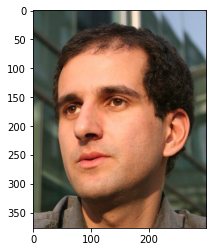

resolusi gambar:  (377, 300, 3)
ukuran gambar:  339300
tipe data:  uint8


In [ ]:
# menampilkan gambar asli Luis Pedro
# Show the data:
print("Banyaknya piksel nol pada gambar ini: {0}".format(np.mean(luis==0)))
plt.imshow(luis)
plt.show()

print("resolusi gambar: ", luis.shape) #menampilkan resolusi
print("ukuran gambar: ", luis.size) #menampilkan ukuran data pada media penyimpan
print("tipe data: ", luis.dtype) #image datatype (kedalaman bit) 

Banyaknya piksel nol pada gambar Luis Pedro adalah 0.001, artinya sama dengan 0,1 %

Banyaknya piksel nol pada gambar ini: 0.0


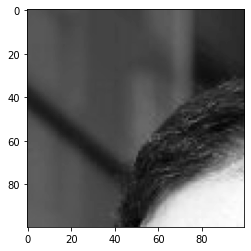

resolusi gambar:  (100, 100)
ukuran gambar:  10000
tipe data:  float64


In [ ]:
# Menampilkan gambar abu-abu Luis Pedro 
plt.gray()
# Show the data:
print("Banyaknya piksel nol pada gambar ini: {0}".format(np.mean(abu_luis==0)))
plt.imshow(abu_luis)
plt.show()

print("resolusi gambar: ", abu_luis.shape) #menampilkan resolusi
print("ukuran gambar: ", abu_luis.size) #menampilkan ukuran data pada media penyimpan
print("tipe data: ", abu_luis.dtype) #image datatype (kedalaman bit) 

Banyaknya piksel nol pada gambar Luis Pedro adalah 0.0, artinya sama dengan 0 %

Sekarang mari kita lihat histogram gambar asli Luis Pedro

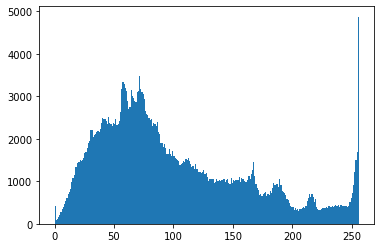

In [ ]:
plt.hist(luis.ravel(),256,[0,256]); 

plt.show()

Apakah benar banyaknya piksel nol pada gambar Luis Pedro adalah 0,1 % ?

Sekarang perhatikan histogram gambar abu-abu Luis Pedro

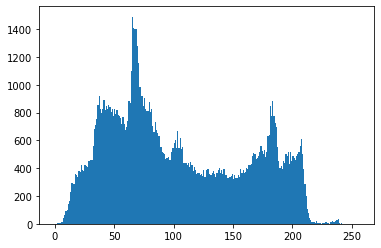

In [ ]:
plt.hist(abu_luis.ravel(),256,[0,256]); 

plt.show()

Apakah benar banyaknya piksel nol pada gambar abu-abu Luis Pedro adalah 0 % ?

## **B. Menggunakan data yang kita upload**

In [ ]:
# upload gambar rose.jpg 
# file akan disimpan sesuai dengan nama file yang diunggah
from google.colab import files
file = files.upload()

Saving rose.jpg to rose.jpg


In [ ]:
import cv2 as cv
rose = cv.cvtColor(cv.imread('rose.jpg'), cv.COLOR_BGR2RGB)
rose = rose[:1600,:1600]

abu_rose = cv.cvtColor(cv.imread('rose.jpg'), cv.COLOR_BGR2GRAY)
abu_rose = abu_rose[:1600,:1600]

Banyaknya piksel nol pada gambar ini: 0.020913007554296505


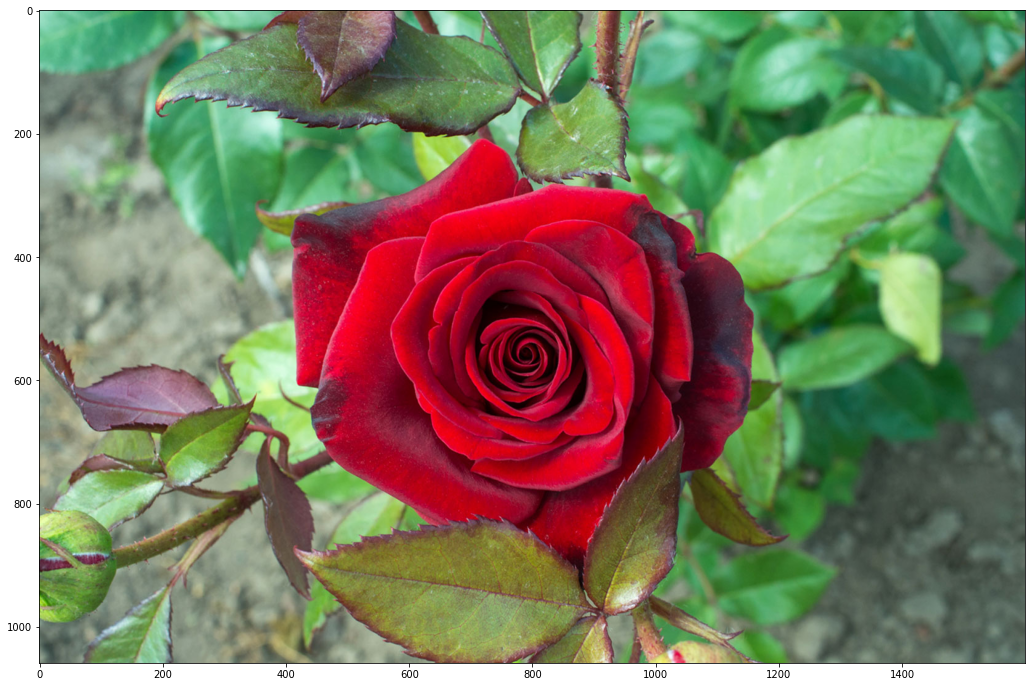

resolusi gambar:  (1059, 1600, 3)
ukuran gambar:  5083200
tipe data:  uint8


In [ ]:
# menampilkan gambar asli rose.jpg
print("Banyaknya piksel nol pada gambar ini: {0}".format(np.mean(rose==0)))
plt.figure(figsize = (20,12))
plt.imshow(rose)
plt.show()

print("resolusi gambar: ", rose.shape) #menampilkan resolusi
print("ukuran gambar: ", rose.size) #menampilkan ukuran data pada media penyimpan
print("tipe data: ", rose.dtype) #image datatype (kedalaman bit) 

Berapa % banyaknya piksel nol pada gambar Rose?

Banyaknya piksel nol pada gambar ini: 3.5410764872521247e-06


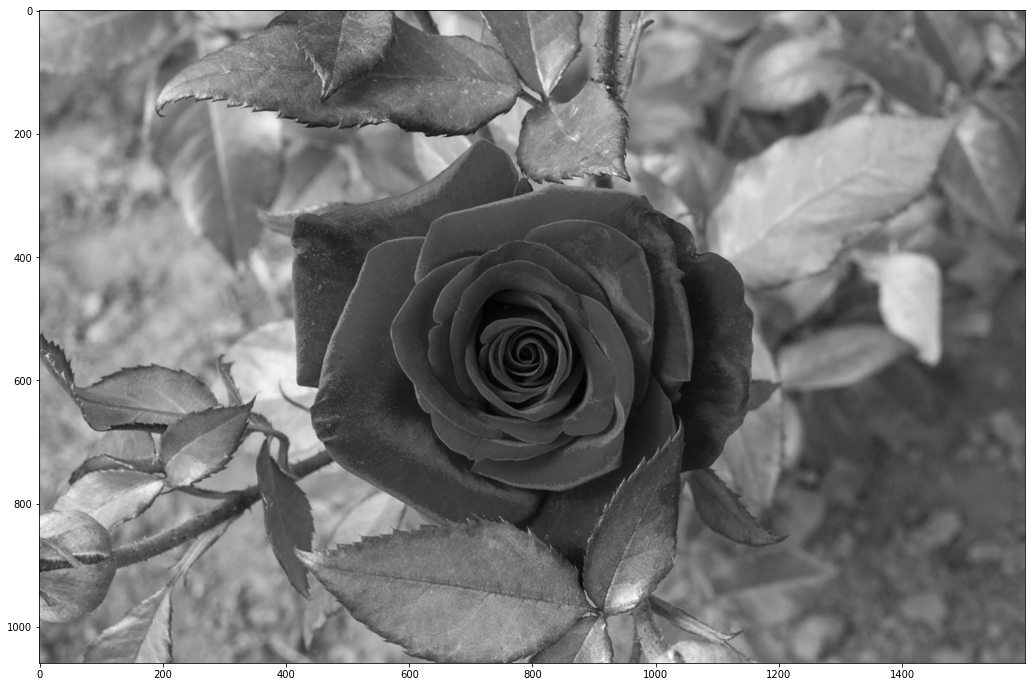

resolusi gambar:  (1059, 1600)
ukuran gambar:  1694400
tipe data:  uint8


In [ ]:
# menampilkan gambar abu-abu rose.jpg
print("Banyaknya piksel nol pada gambar ini: {0}".format(np.mean(abu_rose==0)))
plt.figure(figsize = (20,12))
plt.imshow(abu_rose)
plt.show()

print("resolusi gambar: ", abu_rose.shape) #menampilkan resolusi
print("ukuran gambar: ", abu_rose.size) #menampilkan ukuran data pada media penyimpan
print("tipe data: ", abu_rose.dtype) #image datatype (kedalaman bit) 

Berapa % banyaknya piksel nol pada gambar abu-abu Rose?

3.5410764872521247e-06 artinya 0.0000035410764872521247. Berapa % itu?

Melihat histogram gambar asli Rose.jpg

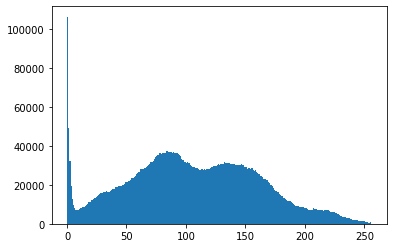

In [ ]:
plt.hist(rose.ravel(),256,[0,256]); 

plt.show()

Melihat histogram gambar abu-abu Rose.jpg

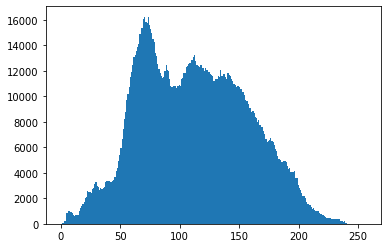

In [ ]:
plt.hist(abu_rose.ravel(),256,[0,256]); 

plt.show()

Apakah banyaknya nilai piksel nol pada gambar Rose dan Abu-Abu Rose sesuai dengan hasil di histogram?

## **C. Mengkompress gambar menggunakan metode kompresi dasar**

Coba kita lihat lagi histogram dari gambar `abu_luis`:

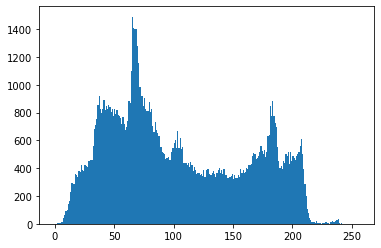

In [ ]:
plt.hist(abu_luis.ravel(),256,[0,256]); 

plt.show()

Bisa kita lihat tidak ada nilai 0 dalam piksel-piksel gambar tersebut.

Pertama-tama, mari kita coba metode kompresi dasar (baseline compression).

Metode kompresi dasar ini akan menyimpan piksel-piksel lainnya dan hanya menampilkan piksel-piksel dalam bit tingkat tinggi (high-order bit):

Banyaknya piksel nol pada gambar ini: 0.0008112874779541446


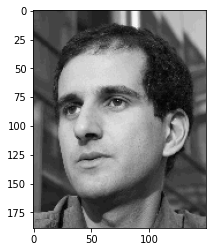

resolusi gambar:  (189, 150)
ukuran gambar:  28350
tipe data:  uint8


In [ ]:
direct = abu_luis[::2,::2].copy()
direct = direct / 8
direct = direct.astype(np.uint8)
print("Banyaknya piksel nol pada gambar ini: {0}".format(np.mean(direct==0)))
plt.imshow(direct)
plt.show()

print("resolusi gambar: ", direct.shape) #menampilkan resolusi
print("ukuran gambar: ", direct.size) #menampilkan ukuran data pada media penyimpan
print("tipe data: ", direct.dtype) #image datatype (kedalaman bit) 

Dari awalnya piksel nol pada gambar abu_luis berjumlah 0%, kini piksel-piksel gambar tersebut di kompress dan banyaknya piksel nol pada gambar tersebut berjumlah 0.07 %

Sekarang mari kita cek histogram dari gambar yang sudah kita kompress:

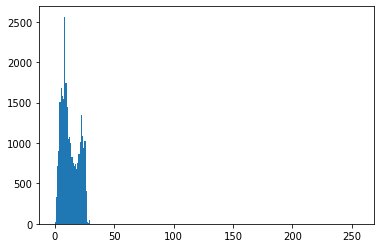

In [ ]:
plt.hist(direct.ravel(),256,[0,256]); 

plt.show()

Kebanyakan dari piksel tersebut sudah terkompress ke angka 0 sampai 25 saja. Ini artinya kita berhasil menghapus sekitar 75% komponen piksel-piksel gambar tersebut. Pun begitu, kita masih bisa mengenali gambar tersebut adalah gambar Luis Pedro!

## **D. Meng kompress gambar menggunakan DWT**

Kemudian, kita masih bisa meng-kompress gambar tersebut menggunakan DWT. Fungsi yang kita gunakan dalam library Mahotas adalah `.daubechies`. Menggunakan DWT ini, kita akan dapat menghilangkan piksel-piksel dalam bit tingkat tinggi (high-order bit):

Banyaknya piksel nol pada gambar ini: 0.6064633068081344


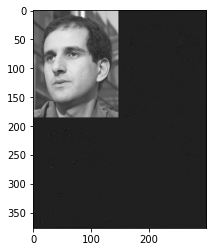

resolusi gambar:  (377, 300)
ukuran gambar:  113100
tipe data:  int8


In [ ]:
# Mentransformasikan gambar menggunakan D8 Wavelet
t = mahotas.daubechies(abu_luis,'D8')
t /= 8
t = t.astype(np.int8)

print("Banyaknya piksel nol pada gambar ini: {0}".format(np.mean(t==0)))
plt.imshow(t)
plt.show()

print("resolusi gambar: ", t.shape) #menampilkan resolusi
print("ukuran gambar: ", t.size) #menampilkan ukuran data pada media penyimpan
print("tipe data: ", t.dtype) #image datatype (kedalaman bit) 

Ada berapa % piksel nol pada gambar yang telah di kompress oleh DWT? 59%

Kemudian coba kita lihat histogram dari gambar tersebut:

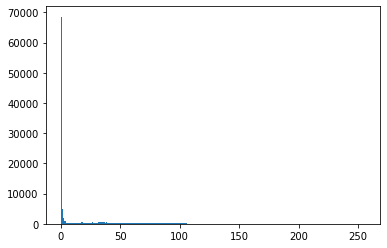

In [ ]:
plt.hist(t.ravel(),256,[0,256]); 

plt.show()

Bisa kita lihat bahwa gambar tersebut setelah mengalami proses kompress DWT, kebanyakan pikselnya hanya tinggal di nilai 0 saja, yaitu sebanyak 59%. Pun begitu,kita tetap masih bisa mengenali gambar tersebut.

## **D. Me rekonstruksi gambar yang telah di kompress oleh DWT**

Setelah kita kompress dan menyisakan sebagian besar nilai-nilai piksel di angka 0, kita dapat merekonstruksi gambar tersebut menggunakan fungsi `.idaubechiest`

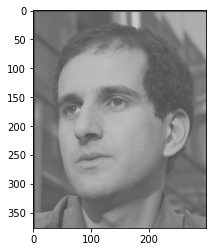

resolusi gambar:  (377, 300)
ukuran gambar:  113100
tipe data:  float64


In [ ]:
r = mahotas.idaubechies(t, 'D8')
plt.imshow(r)
plt.show()

print("resolusi gambar: ", r.shape) #menampilkan resolusi
print("ukuran gambar: ", r.size) #menampilkan ukuran data pada media penyimpan
print("tipe data: ", r.dtype) #image datatype (kedalaman bit) 

Kita cek histogram nya dan hasilnya akan sama dengan seperti sebelum di kompress oleh DWT

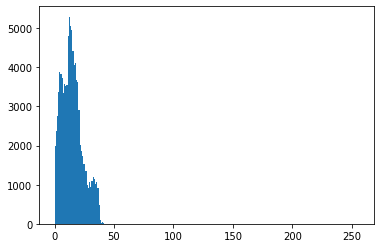

In [ ]:
plt.hist(r.ravel(),256,[0,256]); 

plt.show()

## **E. Mengkompress lebih lanjut menggunakan `soft_threshold`**

Kita masih bisa mengkompress lagi gambar tersebut dengan membuang komponen nilai-nilai kecil yang ada di gambar yang telah terubah. Kita bisa menggunakan fungsi `soft_threshold` dari library `Mahotas`

Banyaknya piksel nol pada gambar ini: 0.7660035366931919
resolusi gambar:  (377, 300)
ukuran gambar:  113100
tipe data:  float64


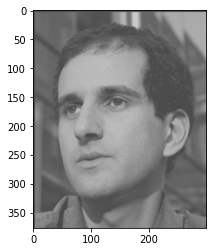

In [ ]:
from mahotas.thresholding import soft_threshold

tt = soft_threshold(t, 12)
print("Banyaknya piksel nol pada gambar ini: {0}".format(np.mean(tt==0)))
# Let us look again at what we have:
rt = mahotas.idaubechies(tt, 'D8')
plt.imshow(rt)

print("resolusi gambar: ", rt.shape) #menampilkan resolusi
print("ukuran gambar: ", rt.size) #menampilkan ukuran data pada media penyimpan
print("tipe data: ", rt.dtype) #image datatype (kedalaman bit) 

Nilai piksel nol pada gambar ini sekarang berjumlah 77%, naik dari yang awalnya cuma 59%. Coba lihat hasil histogram nya:

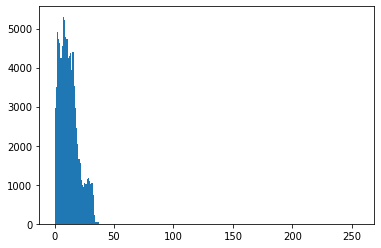

In [ ]:
plt.hist(rt.ravel(),256,[0,256]); 

plt.show()

## F. Menyimpan gambar asli, dan terkompress, lalu membandingkan ukurannya

Kita akan coba menyimpan gambar Luis Pedro ke komputer kita masing-masing dan kita akan membandingkan ukuran masing-masing gambar tersebut.

In [ ]:
# gambar asli Luis Pedro
cv.imwrite('(1)luis_asli.jpg', luis)

# gambar abu-abu Luis Pedro
cv.imwrite('(2)abu_luis.jpg', abu_luis)

# gambar abu Luis kompress sederhana
cv.imwrite('(3)kompress_sederhana.jpg', direct)

# gambar abu Luis kompress DWT
cv.imwrite('(4)kompress_DWT.jpg', r)

# gambar abu Luis kompress soft_threshold
cv.imwrite('(5)kompress_soft_threshold.jpg', rt)


True

Buka Folder Files disamping kiri Google Colab Anda, lalu download masing-masing gambar yang sudah disimpan diatas. Simpan dalam sebuah folder yang sama.

Adakah perbedaan ukuran gambar masing-masing?

## **Latihan**

Cari sebuah gambar .jpg yang high-resolution dari google image.

Ambil baris array dari gambar Anda sesuai dengan 2 nilai digit terakhir NIM Anda, kemudian ditambah 500!

Contoh:
> SYARIFAH MAITSA ZAKIAH

> NIM : 190705009

> Maka baris array gambarnya dimulai 0 - 109

Lalu baru kemudian lakukan hal-hal berikut:
- Ubah menjadi gambar abu-abu !
- Kompress sederhana gambar tersebut !
- Kompress menggunakan `DWT` !
- Kompress menggunakan `soft_threshold` !
- Simpan gambar-gambar berikut di komputer Anda:
  - gambar asli
  - gambar abu-abu
  - gambar kompress sederhana
  - gambar kompress DWT
  - gambar kompress soft-threshold


> Jangan lupa cantumkan jawaban dari pertanyaan berikut di file .ipynb Anda:
1. Berapa % piksel nol pada gambar asli?
2. Berapa % piksel nol pada gambar abu-abu?
3. Berapa % piksel nol pada gambar kompress sederhana?
4. Berapa % piksel nol pada gambar kompress DWT?
5. Berapa % piksel nol pada gambar kompress soft-threshold?
6. Berapa ukuran gambar asli?
7. Berapa ukuran gambar abu-abu?
8. Berapa ukuran gambar kompress sederhana?
9. Berapa ukuran gambar kompress DWT?
10. Berapa ukuran gambar kompress soft-threshold?

KIRIM:
> file .ipynb,

> serta gambar-gambar Anda

> melalui wetransfer

> ke EMAIL zakiulfahmi.fst@ar-raniry.ac.id dengan format:
Nama Anda_PC_Jumat_LATIHAN_05

Dikumpulkan sebelum pertemuan minggu depan yaitu tanggal 9 Juni 2022, pukul 23.59 WIB!




Good luck!

Penyemangat dari Imam Syafi'i:


```
ومن لم يذق مر التعلم ساعة, تجرع ذل الجهل طول حياته
```



`Bila kamu tak tahan penatnya belajar,
maka kamu akan menanggung perihnya kebodohan.`

